In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import folium   
# from branca.element import Figure    
import plotly.express as px
# import nbformat
pd.set_option('display.max_columns', None)

df = pd.read_csv("data/allocine_bronze.csv")

C:\Users\impej\AppData\Local\Temp\ipykernel_10632\4070892949.py:11: DtypeWarning: Columns (15,22,23,24,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/allocine_bronze.csv")


In [3]:
df

,titre,acteur_1,acteur_2,acteur_3,note_presse,note_spectateur,duree,genre,pays,type,budget,budget_en_$,nominations,prix,description,date,annee_production,nb_pays_uniques,pays_1,pays_2,pays_3,pays_4,pays_5,pays_6,pays_7,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,Mon Crime,Nadia Tereszkiewicz,Rebecca Marder,Isabelle Huppert,"4,0","3,9",103,"Comédie dramatique,Policier,Judiciaire,Drame,C...",France,Long-métrage,NaN,NaN,0,0,"Dans les années 30 à Paris, Madeleine Verdier,...",NaN,2023,1,France,NaN,NaN,NaN,NaN,NaN,NaN,Comédie dramatique,Policier,Judiciaire,Drame,Comédie,NaN,NaN
1,Kanam,Amala Akkineni,Sharwanand,Ritu Varma,"3,1",NaN,150,"Drame,Science fiction",Inde,Long-métrage,NaN,NaN,0,0,"Perdu par le décès de sa mère, il invente une ...",09-09-2022,2022,1,Inde,NaN,NaN,NaN,NaN,NaN,NaN,Drame,Science fiction,NaN,NaN,NaN,NaN,NaN
2,Brahmāstra: Part One – Shiva,Ranbir Kapoor,Alia Bhatt,Amitabh Bachchan,"3,1",NaN,167,"Aventure,Fantastique",Inde,Long-métrage,NaN,NaN,0,0,NaN,09-09-2022,2022,1,Inde,NaN,NaN,NaN,NaN,NaN,NaN,Aventure,Fantastique,NaN,NaN,NaN,NaN,NaN
3,Oke Oka Jeevitham,Amala Akkineni,Sharwanand,Ritu Varma,NaN,NaN,150,"Drame,Science fiction",Inde,Long-métrage,NaN,NaN,0,0,"Perdu par le décès de sa mère, il invente une ...",09-09-2022,2022,1,Inde,NaN,NaN,NaN,NaN,NaN,NaN,Drame,Science fiction,NaN,NaN,NaN,NaN,NaN
4,Le Bonheur des uns...,Vincent Cassel,Bérénice Bejo,Florence Foresti,"2,9","2,6",100,Comédie,"France,Belgique",Long-métrage,NaN,NaN,0,0,"Léa, Marc, Karine et Francis sont deux couples...",09-09-2020,2020,2,France,Belgique,NaN,NaN,NaN,NaN,NaN,Comédie,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83943,Ceux qui ne s'envolent jamais,NaN,NaN,NaN,NaN,NaN,113,NaN,Yougoslavie,Long-métrage,NaN,NaN,0,0,Une enfant leucemique va vivre a la campagne a...,NaN,0,1,Yougoslavie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83944,Au pays de citron,NaN,NaN,NaN,NaN,NaN,52,NaN,France,Long-métrage,NaN,NaN,0,0,Ou le royaume magique entr'ouvert par Mathilde...,NaN,0,1,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83945,Le pays ou vivait la terre,NaN,NaN,NaN,NaN,NaN,94,NaN,France,Long-métrage,NaN,NaN,0,0,"Dans un village perdu du Maramures, en Roumani...",NaN,0,1,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83946,Antiromantika,NaN,NaN,NaN,NaN,NaN,0,NaN,kazakhstan,Long-métrage,NaN,NaN,0,0,NaN,NaN,0,1,kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83948 entries, 0 to 83947
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             83948 non-null  object 
 1   acteur_1          75803 non-null  object 
 2   acteur_2          73214 non-null  object 
 3   acteur_3          70465 non-null  object 
 4   note_presse       55135 non-null  object 
 5   note_spectateur   12223 non-null  object 
 6   duree             83948 non-null  int64  
 7   genre             49353 non-null  object 
 8   pays              83948 non-null  object 
 9   type              83948 non-null  object 
 10  budget            7203 non-null   object 
 11  budget_en_$       7202 non-null   float64
 12  nominations       83948 non-null  int64  
 13  prix              83948 non-null  int64  
 14  description       62868 non-null  object 
 15  date              19880 non-null  object 
 16  annee_production  83948 non-null  int64 

<font color='red'><h2>Répartition des films par bloc d'année de 10 </h2></font>

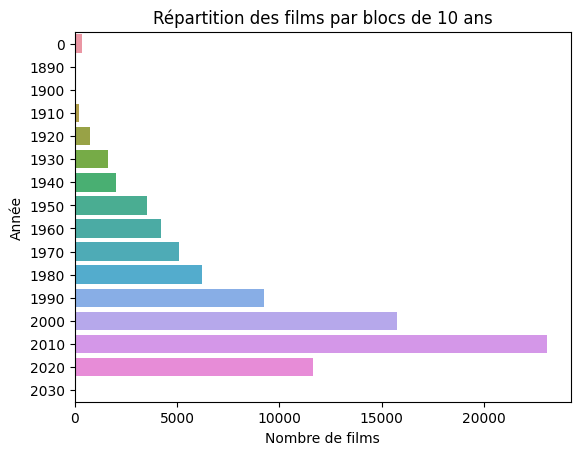

In [6]:
# Création d'un masque pour les blocs de 10 ans
annee_bloc = (df['annee_production'] // 10) * 10

# Affichage des données par blocs de 10 ans en utilisant le masque
sns.countplot(y=annee_bloc, data=df)
plt.ylabel("Année")
plt.xlabel("Nombre de films")
plt.title("Répartition des films par blocs de 10 ans")
plt.show()

  <font color='red'><h2> Nuage de mots pour genre_1 MOYENNE </h2></font>


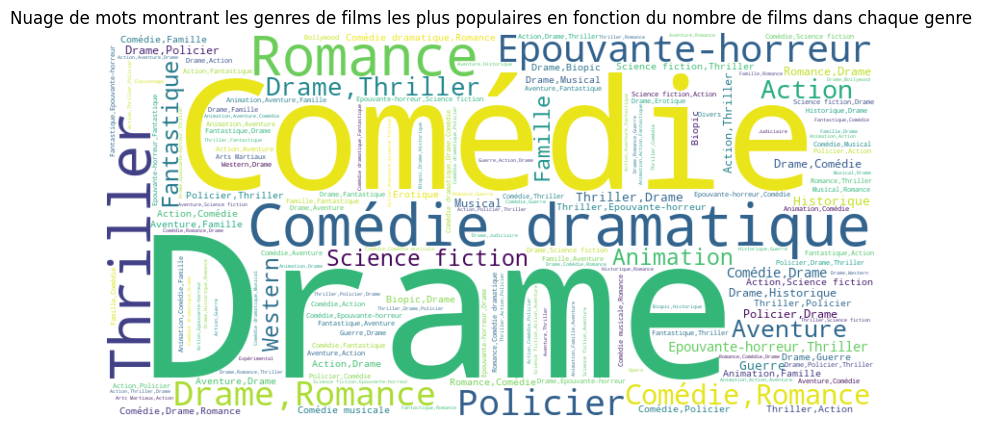

In [7]:
! pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer une série avec les genres de films et leur nombre de films
data = df['genre'].value_counts()

# Créer le nuage de mots avec WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots montrant les genres de films les plus populaires en fonction du nombre de films dans chaque genre")
plt.show()


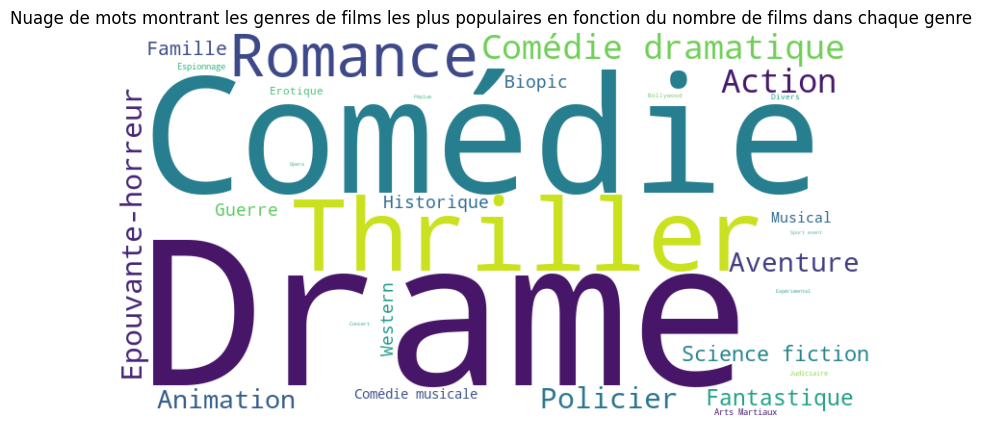

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer une série avec les genres de films et leur nombre de films
data = df['genre_1'].value_counts()

# Créer le nuage de mots avec WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots montrant les genres de films les plus populaires en fonction du nombre de films dans chaque genre")
plt.show()

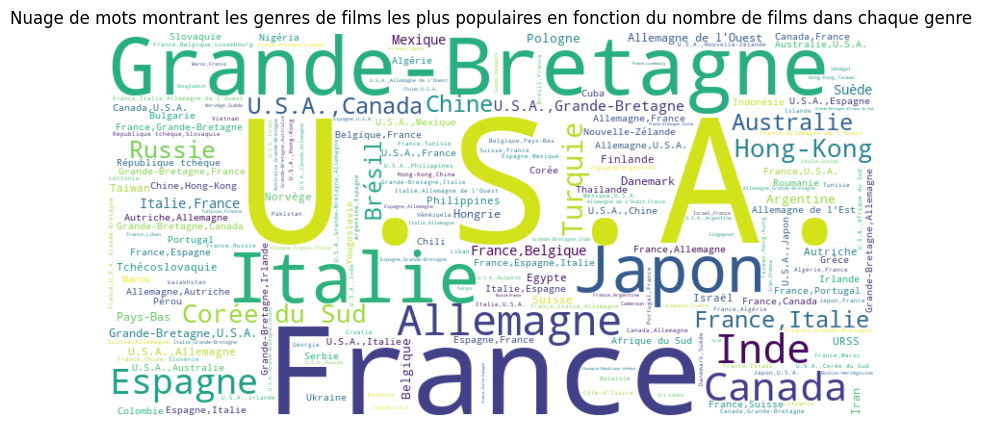

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer une série avec les genres de films et leur nombre de films
data = df['pays'].value_counts()

# Créer le nuage de mots avec WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots montrant les genres de films les plus populaires en fonction du nombre de films dans chaque genre")
plt.show()

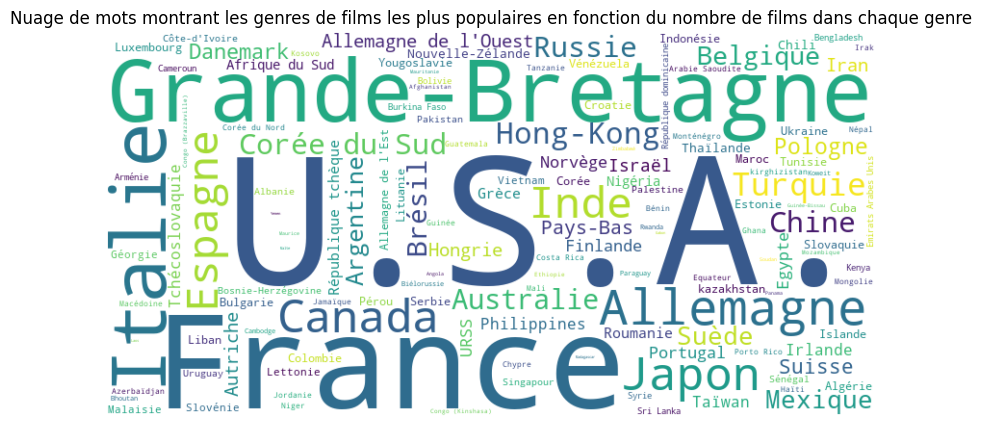

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer une série avec les genres de films et leur nombre de films
data = df['pays_1'].value_counts()

# Créer le nuage de mots avec WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots montrant les genres de films les plus populaires en fonction du nombre de films dans chaque genre")
plt.show()